In [ ]:
#Description : Sentiment Analysis Application that parses tweets scraped from twitter using Python

In [2]:
#Importing libraries
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [15]:
#Loading data
from google.colab import files
uploaded = files.upload()

Saving Login.csv to Login.csv


In [16]:
#Getting data
log = pd.read_csv('Login.csv')


In [21]:
#Twitter API credentials
consumerKey = 'sKK4RcfLdVvfz1sOU6jgez4ch'
consumerSecret = '23YjSUz1yerd27DfIs63uP2xawAf1loPNdNwg2FvTucd3F4aeh'
accessToken = '1280815370308386818-tuGw07SclxLMixBDu4Iubwmk9cusMK'
accessTokenSecret = 'EKRYi2DbjPhocXlqSdrNkl75qxgEmJex9E6kxAlpXX7Sg'


In [22]:
#Creating an authentication object
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret)

#Setting access token and access token secret
authenticate.set_access_token(accessToken, accessTokenSecret)

#Creating API object while passing in the auth information
api = tweepy.API(authenticate, wait_on_rate_limit = True)

In [28]:
#Extracting data from twitter user
posts = api.user_timeline(screen_name ="JoeBiden", count= 100, lang = "en", tweet_mode="extended")

#Printing recent tweets
print("Show 5 recent tweets: \n")
i = 1
for tweet in posts[0:5]:
  print(str(i) + ') ' + tweet.full_text + '\n')
  i = i + 1

Show 5 recent tweets: 

1) To the families and friends of those we've lost due to COVID-19 — Jill and I send our love and prayers.

We know how tough it is to find purpose in the memory of the loved one you lost. It will take time — but you will find it, and we will find our purpose as a nation. https://t.co/paD7CcG8ns

2) Wearing a mask isn't a political statement — it's a patriotic duty.

3) This afternoon, @KamalaHarris and I met with a bipartisan group of governors from the @NatlGovsAssoc’s Executive Committee. We might be Democrats and Republicans, but we’re Americans first — and together, we’re going to beat COVID-19. https://t.co/pEkHtf4l4d

4) Throughout the pandemic, our nation’s governors have stepped up to meet the moment. @KamalaHarris and I just met with the @NatlGovsAssoc to discuss how we’ll work together to combat COVID-19. Tune in. https://t.co/YiTjkIStbU

5) It’s not enough to praise our essential workers — we have to protect and pay them.



In [29]:
#Creating dataframe
df = pd.DataFrame( [tweet.full_text for tweet in posts], columns=['Tweets'])

#Show first 5 rows
df.head()

,Tweets
0,To the families and friends of those we've los...
1,Wearing a mask isn't a political statement — i...
2,"This afternoon, @KamalaHarris and I met with a..."
3,"Throughout the pandemic, our nation’s governor..."
4,It’s not enough to praise our essential worker...


In [30]:
# Creating a function to clean the tweets
def cleanTxt(text):
 text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
 text = re.sub('#', '', text) # Removing '#' hash tag
 text = re.sub('RT[\s]+', '', text) # Removing Retweet
 text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
 
 return text


# Cleaning the tweets
df['Tweets'] = df['Tweets'].apply(cleanTxt)

# Show the cleaned tweets
df

,Tweets
0,To the families and friends of those we've los...
1,Wearing a mask isn't a political statement — i...
2,"This afternoon, and I met with a bipartisan g..."
3,"Throughout the pandemic, our nation’s governor..."
4,It’s not enough to praise our essential worker...
...,...
95,Count every vote.
96,: Here are the facts...
97,"To make sure every vote is counted, we’re sett..."
98,We won't rest until everyone's vote is counted...


In [31]:
# Creating a function to get the subjectivity
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

# Creating a function to get the polarity
def getPolarity(text):
   return  TextBlob(text).sentiment.polarity


# Creating two new columns 'Subjectivity' & 'Polarity'
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

# Show the new dataframe with columns 'Subjectivity' & 'Polarity'
df

,Tweets,Subjectivity,Polarity
0,To the families and friends of those we've los...,0.652083,0.171528
1,Wearing a mask isn't a political statement — i...,0.100000,0.000000
2,"This afternoon, and I met with a bipartisan g...",0.333333,0.250000
3,"Throughout the pandemic, our nation’s governor...",0.000000,0.000000
4,It’s not enough to praise our essential worker...,0.400000,0.000000
...,...,...,...
95,Count every vote.,0.000000,0.000000
96,: Here are the facts...,0.000000,0.000000
97,"To make sure every vote is counted, we’re sett...",0.447811,0.212121
98,We won't rest until everyone's vote is counted...,0.000000,0.000000


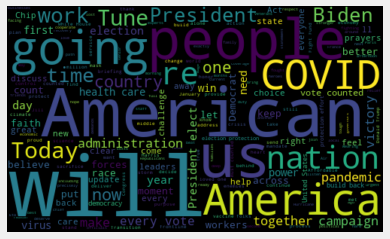

In [44]:
# word cloud visualization
allWords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)

plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [36]:
# Creating a function to compute negative (-1), neutral (0) and positive (+1) analysis
def getAnalysis(score):

  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

df['Analysis'] = df['Polarity'].apply(getAnalysis)
# Show the dataframe
df

,Tweets,Subjectivity,Polarity,Analysis
0,To the families and friends of those we've los...,0.652083,0.171528,Positive
1,Wearing a mask isn't a political statement — i...,0.100000,0.000000,Neutral
2,"This afternoon, and I met with a bipartisan g...",0.333333,0.250000,Positive
3,"Throughout the pandemic, our nation’s governor...",0.000000,0.000000,Neutral
4,It’s not enough to praise our essential worker...,0.400000,0.000000,Neutral
...,...,...,...,...
95,Count every vote.,0.000000,0.000000,Neutral
96,: Here are the facts...,0.000000,0.000000,Neutral
97,"To make sure every vote is counted, we’re sett...",0.447811,0.212121,Positive
98,We won't rest until everyone's vote is counted...,0.000000,0.000000,Neutral


In [37]:
# Printing positive tweets 
print('Printing positive tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity']) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Positive'):
    print(str(j) + ') '+ sortedDF['Tweets'][i])
    print()
    j= j+1

Printing positive tweets:

1) To the families and friends of those we've lost due to COVID-19 — Jill and I send our love and prayers.

We know how tough it is to find purpose in the memory of the loved one you lost. It will take time — but you will find it, and we will find our purpose as a nation. 

2) This afternoon,  and I met with a bipartisan group of governors from the ’s Executive Committee. We might be Democrats and Republicans, but we’re Americans first — and together, we’re going to beat COVID-19. 

3) The workers on the frontlines of this pandemic are making extraordinary sacrifices every single day. They deserve leaders who will listen and work as hard for them as they are for their communities. As president, that’s exactly what I’ll do. 

4) The health care workers on the frontlines of this pandemic are true heroes. Tune in as we thank them for their work and discuss how a Biden-Harris administration will support them. 

5) Today,  and I met with some of our country's most

In [38]:
# Printing negative tweets  
print('Printing negative tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity'],ascending=False) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Negative'):
    print(str(j) + ') '+sortedDF['Tweets'][i])
    print()
    j=j+1

Printing negative tweets:

1) Today marks five years since the horrific ISIS terrorist attacks in Paris — an assault not just on the people of France but against our common humanity.

As president, I will work to protect Americans and our allies, countering terrorism and extremist violence in all forms.

2) If you’re sick, if you’re struggling, if you’re worried about how you’re going to get through the day — we will not abandon you.

We will not leave you to face these challenges alone. 

3) When I’m speaking to foreign leaders, I’m telling them: America is going to be back. We’re going to be back in the game.

4) I spent the morning with the co-chairs of my COVID-19 Council discussing the status of this pandemic and how we move forward. Tune in as I provide an update on how we're going to beat this virus. 

5) It’s time to put away the harsh rhetoric.

To lower the temperature.

To see each other again.

To listen to each other again.

6) I spent the afternoon attending briefings on 

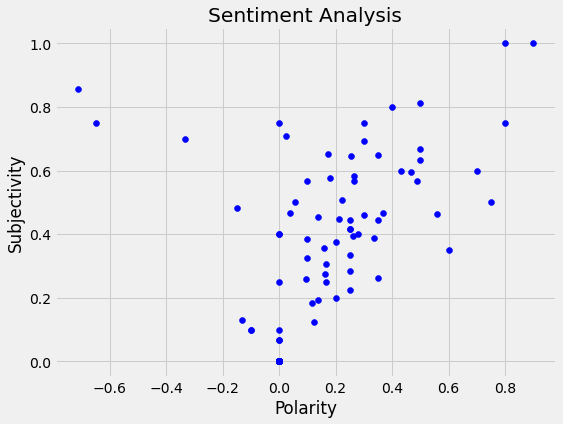

In [39]:
# Plotting 
plt.figure(figsize=(8,6)) 
for i in range(0, df.shape[0]):
  plt.scatter(df["Polarity"][i], df["Subjectivity"][i], color='Blue') 
# plt.scatter(x,y,color)   
plt.title('Sentiment Analysis') 
plt.xlabel('Polarity') 
plt.ylabel('Subjectivity') 
plt.show()

In [40]:
# Printing the percentage of positive tweets
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']
ptweets

round( (ptweets.shape[0] / df.shape[0]) * 100 , 1)

54.0

In [41]:
# Printing the percentage of negative tweets
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Tweets']
ntweets

round( (ntweets.shape[0] / df.shape[0]) * 100, 1)

7.0

In [42]:
# Show the value counts
df['Analysis'].value_counts()

Positive    54
Neutral     39
Negative     7
Name: Analysis, dtype: int64

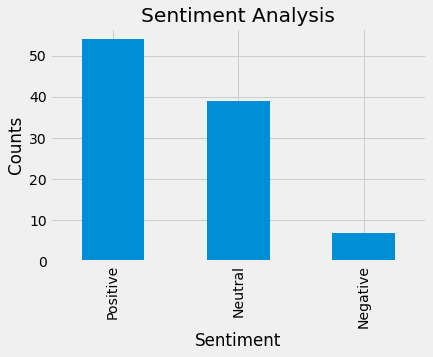

In [43]:
# Plotting and visualizing the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'bar')
plt.show()